# Gensim
Gensim　是一款专注于主题模型的自然处理工具包。

# Word2vec
gensim 中　word2vec 模型接受的输入是句子列表，并且每一个句子是已经做好分词的句子，由分词构成的列表序列。句子可以是已经全部加载进内存的文本，也可以使一个迭代器对象，源源不断的从网络或者文件系统读入句子，迭代器用于内存不够的情况。

In [8]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, size = 8, window = 1, min_count=1, workers = 1, sg = 0)

In [9]:
print(model)
words = list(model.wv.vocab)
print(words)
print(model['sentence'])
model.save('model.bin')
new_model = Word2Vec.load('model.bin')

Word2Vec(vocab=14, size=8, alpha=0.025)
['and', 'word2vec', 'for', 'sentence', 'this', 'is', 'one', 'second', 'another', 'the', 'first', 'yet', 'final', 'more']
[ 0.01363952 -0.0188516  -0.04008975 -0.01244195  0.00393636  0.05465494
 -0.04620307 -0.04175122]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


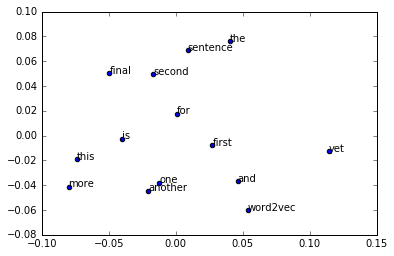

In [10]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()